In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [108]:
df=pd.read_csv('/content/crime_dataset_india.csv')
df

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [109]:
date_cols = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%d-%m-%Y %H:%M', errors='coerce')
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,2020-01-02 00:00:00,2020-01-01 00:00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT
1,2,2020-01-01 19:00:00,2020-01-01 01:00:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT
2,3,2020-01-02 05:00:00,2020-01-01 02:00:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT
3,4,2020-01-01 05:00:00,2020-01-01 03:00:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00
4,5,2020-01-01 21:00:00,2020-01-01 04:00:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,NaT,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaT
40156,40157,2024-07-31 14:00:00,NaT,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-09-29 14:00:00
40157,40158,2024-08-02 03:00:00,NaT,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT
40158,40159,2024-08-01 19:00:00,NaT,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaT


In [110]:
df.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [111]:
print("Shape:", df.shape, "Size:", df.size)

Shape: (40160, 14) Size: 562240


In [112]:
df = df.drop(columns=['Report Number', 'Crime Code'])
df.columns

Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'Crime Description', 'Victim Age', 'Victim Gender', 'Weapon Used',
       'Crime Domain', 'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [113]:
df.drop('Date of Occurrence',axis=1,inplace=True)
df.rename(columns={'Time of Occurrence':'Date and Time of Occurrence'},inplace=True)
df

,Date Reported,Date and Time of Occurrence,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,2020-01-02 00:00:00,01-01-2020 01:11,Ahmedabad,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT
1,2020-01-01 19:00:00,01-01-2020 06:26,Chennai,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT
2,2020-01-02 05:00:00,01-01-2020 14:30,Ludhiana,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT
3,2020-01-01 05:00:00,01-01-2020 14:46,Pune,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00
4,2020-01-01 21:00:00,01-01-2020 16:51,Pune,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...
40155,2024-08-01 16:00:00,31-07-2024 05:05,Kolkata,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaT
40156,2024-07-31 14:00:00,31-07-2024 04:14,Mumbai,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-09-29 14:00:00
40157,2024-08-02 03:00:00,31-07-2024 21:33,Kanpur,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT
40158,2024-08-01 19:00:00,31-07-2024 11:05,Patna,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaT


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date Reported                40160 non-null  datetime64[ns]
 1   Date and Time of Occurrence  40160 non-null  object        
 2   City                         40160 non-null  object        
 3   Crime Description            40160 non-null  object        
 4   Victim Age                   40160 non-null  int64         
 5   Victim Gender                40160 non-null  object        
 6   Weapon Used                  34370 non-null  object        
 7   Crime Domain                 40160 non-null  object        
 8   Police Deployed              40160 non-null  int64         
 9   Case Closed                  40160 non-null  object        
 10  Date Case Closed             20062 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)

In [115]:
df.describe()

,Date Reported,Victim Age,Police Deployed,Date Case Closed
count,40160,40160.00000,40160.000000,20062
mean,2022-04-18 03:29:56.952191232,44.49126,10.006250,2022-07-15 10:08:33.388495616
min,2020-01-01 05:00:00,10.00000,1.000000,2020-01-08 21:00:00
25%,2021-02-24 02:00:00,27.00000,5.000000,2021-05-14 21:15:00
50%,2022-04-18 05:00:00,44.00000,10.000000,2022-07-15 21:30:00
75%,2023-06-10 10:00:00,62.00000,15.000000,2023-09-08 19:45:00
max,2024-08-02 18:00:00,79.00000,19.000000,2026-07-21 16:00:00
std,NaN,20.22555,5.467951,NaN


In [116]:
df.isnull().sum()

,0
Date Reported,0
Date and Time of Occurrence,0
City,0
Crime Description,0
Victim Age,0
Victim Gender,0
Weapon Used,5790
Crime Domain,0
Police Deployed,0
Case Closed,0


In [117]:
df.fillna({
    'Weapon Used': 'Unknown',
    'Date Case Closed': pd.Timestamp('2025-01-01')
}, inplace=True)

df.isnull().sum()

,0
Date Reported,0
Date and Time of Occurrence,0
City,0
Crime Description,0
Victim Age,0
Victim Gender,0
Weapon Used,0
Crime Domain,0
Police Deployed,0
Case Closed,0


In [118]:
df.nunique()

,0
Date Reported,25546
Date and Time of Occurrence,39886
City,29
Crime Description,21
Victim Age,70
Victim Gender,3
Weapon Used,7
Crime Domain,4
Police Deployed,19
Case Closed,2


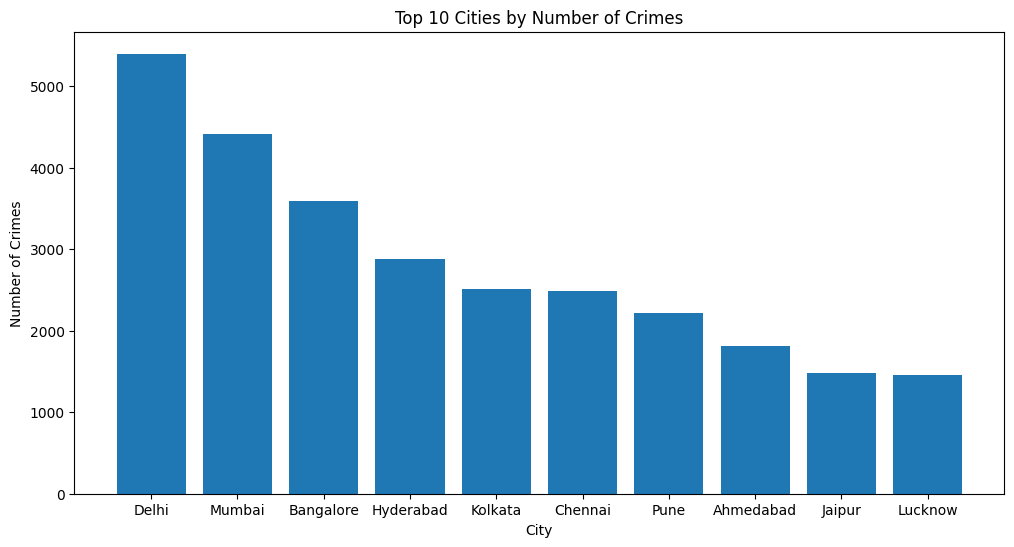

In [119]:
#TOP 10 CITIES BY NUMBER OF CRIMES
a=df['City'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.bar(a.index,a.values)
plt.xticks(rotation=360)
plt.title('Top 10 Cities by Number of Crimes')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.show()

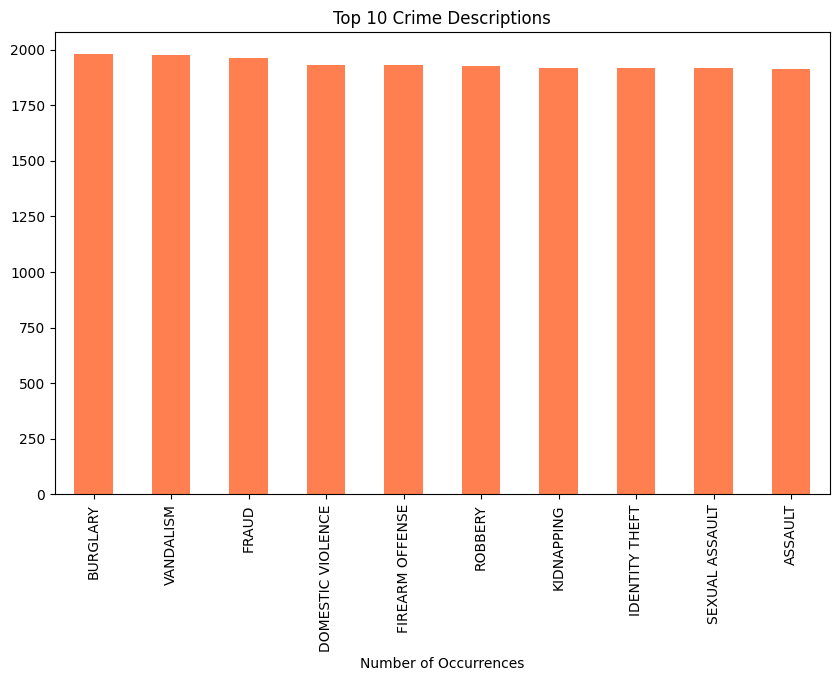

In [168]:
# top crime distribution
top_crimes = df['Crime Description'].value_counts().head(10)

top_crimes.plot(kind='bar', figsize=(10,6), color='coral')
plt.xlabel('Number of Occurrences')
plt.title('Top 10 Crime Descriptions')

plt.show()

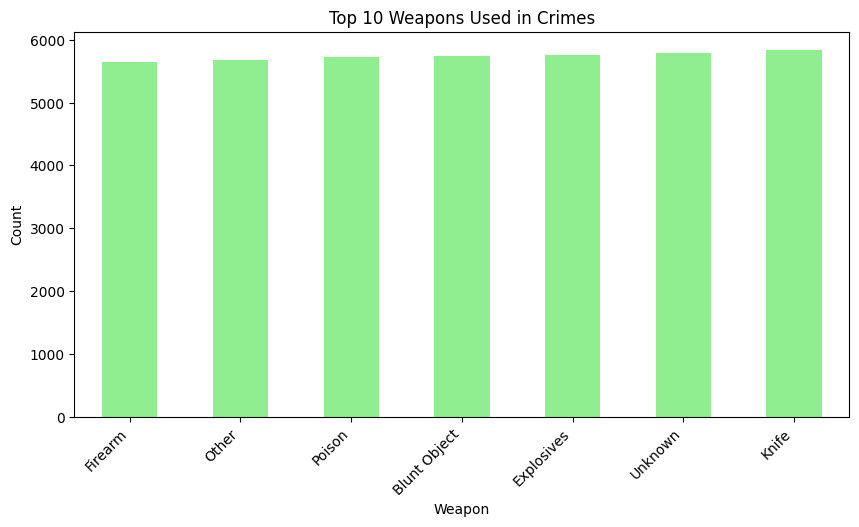

In [121]:
# top 10 weapons used in crimes (smallest to largest)
top_weapons = df['Weapon Used'].value_counts().head(10)
top_weapons.sort_values().plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title('Top 10 Weapons Used in Crimes')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


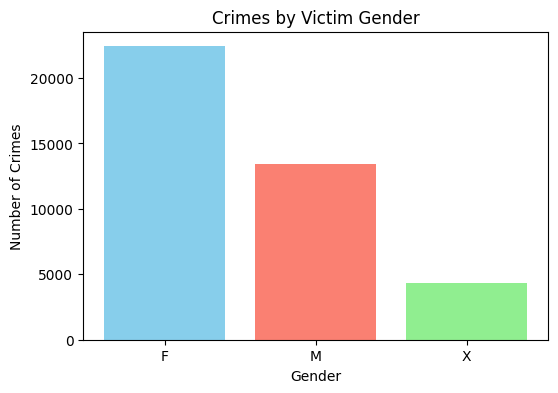

In [122]:
#identify crimes by victim gender
gender_counts = df['Victim Gender'].value_counts()
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.title('Crimes by Victim Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Crimes')
plt.show()


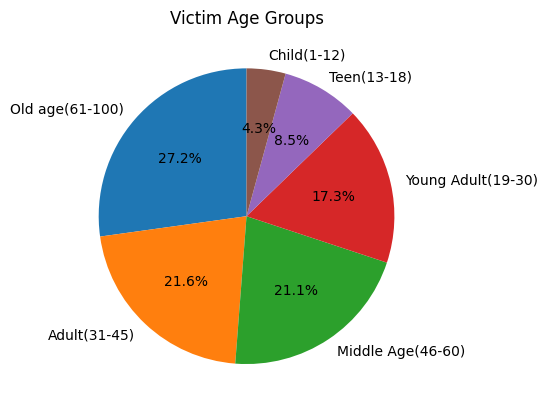

In [171]:
df['Age Group'] = pd.cut(df['Victim Age'], bins=[0,12,18,30,45,60,100],
                         labels=['Child(1-12)','Teen(13-18)','Young Adult(19-30)','Adult(31-45)','Middle Age(46-60)','Old age(61-100)'])
df['Age Group'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Victim Age Groups')
plt.ylabel('')
plt.show()


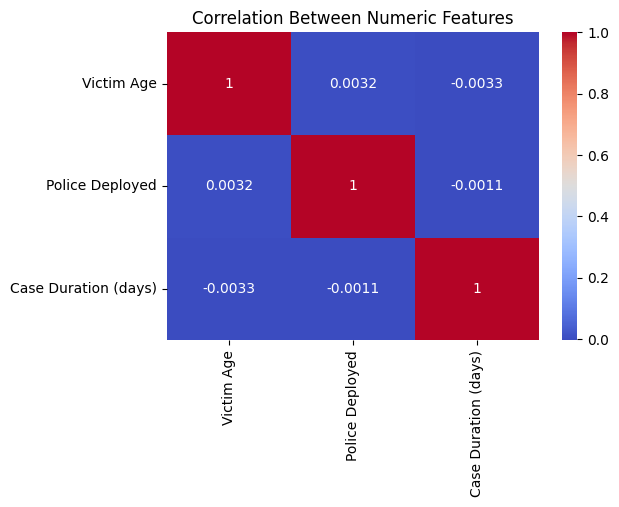

In [124]:
#Correlation between victim age, police deployed,case duration

df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y %H:%M')
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], format='%d-%m-%Y %H:%M', errors='coerce')

df['Case Duration (days)'] = (df['Date Case Closed'] - df['Date Reported']).dt.days

df = df.dropna(subset=['Case Duration (days)'])

numeric_cols = ['Victim Age', 'Police Deployed', 'Case Duration (days)']

plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

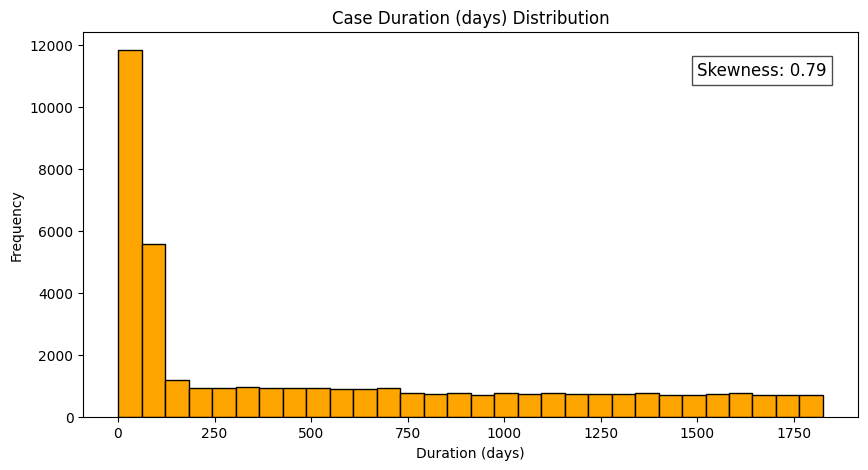

In [125]:

case_duration = (df['Date Case Closed'] - df['Date Reported']).dt.days.dropna()

#calculate skewness
skewness_value = skew(case_duration)

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(case_duration, bins=30, color='orange', edgecolor='black')
plt.title('Case Duration (days) Distribution')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.text(1500, 11000, f'Skewness: {skewness_value:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
plt.show()


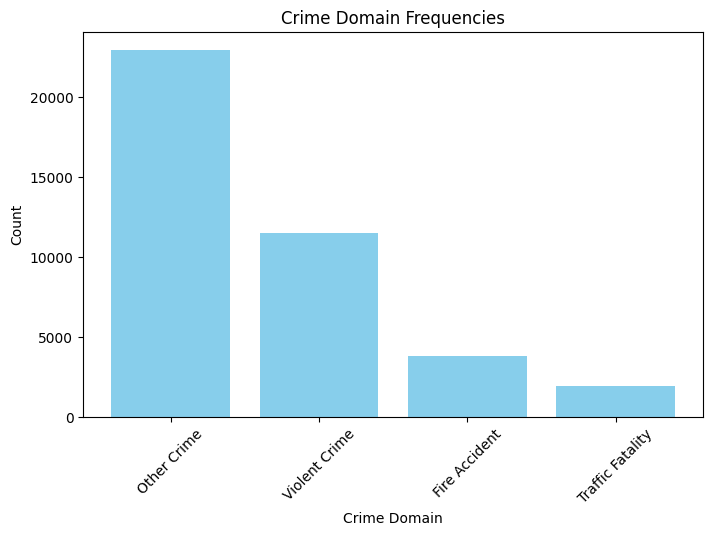

In [126]:
domain_counts = df['Crime Domain'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(domain_counts.index, domain_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title('Crime Domain Frequencies')
plt.xlabel('Crime Domain')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-471299896.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.groupby(pd.Grouper(key='Date Reported', freq='M')).size()


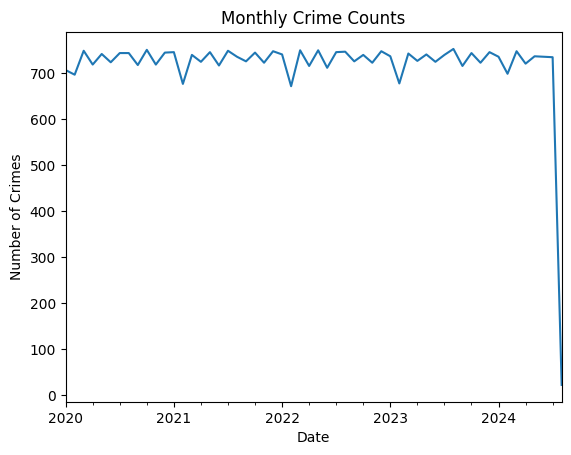

In [127]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y %H:%M')

monthly_counts = df.groupby(pd.Grouper(key='Date Reported', freq='M')).size()

monthly_counts.plot()
plt.title('Monthly Crime Counts')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()
